# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/gen_prof_80.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep80_0,gencell_ep80_1,gencell_ep80_2,gencell_ep80_3,gencell_ep80_4,gencell_ep80_5,gencell_ep80_6,gencell_ep80_7,gencell_ep80_8,gencell_ep80_9,⋯,gencell_ep80_490,gencell_ep80_491,gencell_ep80_492,gencell_ep80_493,gencell_ep80_494,gencell_ep80_495,gencell_ep80_496,gencell_ep80_497,gencell_ep80_498,gencell_ep80_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,3.462331,3.494627,3.285695,3.089037,3.360441,3.061184,3.210714,3.152705,3.319289,3.114902,⋯,3.362721,3.180603,3.732762,3.465390,3.334496,3.167312,3.202099,3.148956,3.329287,3.165922
Cd47,3.180821,3.177924,3.041074,2.690692,3.045062,2.503366,2.893141,2.899706,2.910679,2.795418,⋯,3.110086,2.928579,3.313202,3.104616,3.070355,2.848134,2.901086,2.813671,2.944392,2.896713
Elmo2,2.307756,2.331210,2.687586,2.492828,2.358551,2.582039,2.755795,2.730761,2.555350,2.681450,⋯,2.437696,2.734283,2.315177,2.407732,2.751386,2.876409,2.681648,2.810731,2.521446,2.500986
Crip2,3.378415,3.355543,4.509332,5.715527,3.859403,6.268563,5.804911,5.214245,4.618742,5.756897,⋯,3.741282,5.539097,3.107657,3.446896,4.367377,5.939815,5.227129,5.951539,4.560852,5.048187
Pprc1,5.063789,5.308420,5.353830,7.207256,5.369672,7.526260,6.696799,6.286626,6.153567,7.041406,⋯,5.522294,6.522498,4.707641,5.316551,5.928508,6.966415,6.346629,6.951366,6.082407,6.600738
Ccdc174,5.246639,5.135162,5.534516,6.768316,5.603497,7.038081,6.137538,6.207170,5.805289,6.574311,⋯,5.564920,6.341606,4.874798,5.286533,5.762803,6.344300,5.959956,6.355892,6.064406,6.354742


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Rplp1, Actg1, Rps29, Rps5, B2m, Perp, S100a11, Hspb1, Anxa2, Sfn 
	   Rps12, Anxa8, Anxa1, Fau, Ly6d, Dmkn, Krt10, Lgals7, Rps26, Krt15 
	   Sbsn, Fam25c, Fos, Dsg1a, Rpl19, Btg2, Calm4, Krt17, Rpl14, Tmsb4x 
Negative:  Phkg1, Cybrd1, Trim23, Stxbp4, Slc25a36, Nup98, Zfp12, Spc24, Prkar2b, Lamb1 
	   Zfyve9, Apex2, Fbxl18, Krit1, Zfp553, Kansl2, Pdpn, Scarb1, R3hdm1, Tmem132a 
	   Xpo5, Rbm15, Tonsl, Mad2l1, Rps6ka3, Dennd5a, Fxn, Tfdp1, Trim27, Gbe1 
PC_ 2 
Positive:  Sbsn, Krtdap, Iffo2, Scel, Casz1, Dmkn, Gm94, Ly6g6c, Pak3, Sdr16c5 
	   Capns2, Defb1, Cldn1, Spink5, Dapl1, Lipm, Rab11fip1, Abca12, Fam25c, Clca2 
	   Fosb, Hal, Klf4, Il20rb, Nfe2l1, Tmprss13, Tmem45a, Cds1, Lgals7, Gdpd2 
Negative:  Eno1, Zfp317, Galk1, Cpsf6, Ctsz, Gatad1, Cand2, Impact, Zfhx3, Tubb6 
	   Tspan3, Scd2, Rhoc, Rab31, Dcaf13, Mrpl42, Fam162a, Fstl1, Gja1, Timmdc1 
	   Lgals1, Lactb2, Dync1li1, Tes, Hmmr, Vmp1, Pex1, Ctsl, Fth1, Ankib1 
PC_ 3 
Positive:  Nupr1, Acer1, Klk8, Ptgs1, Cra

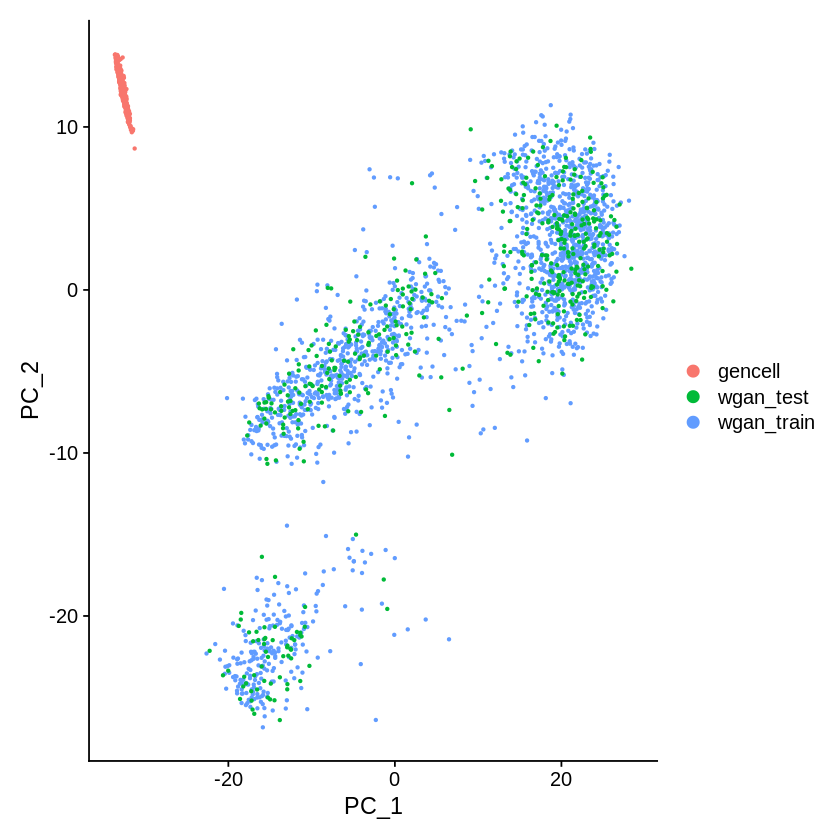

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

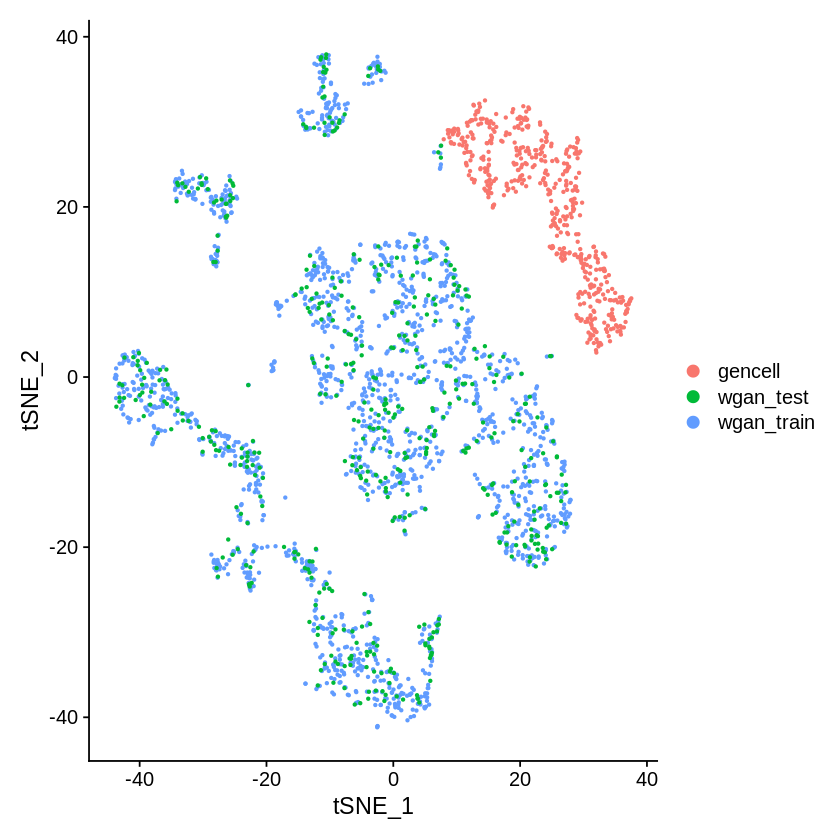

In [19]:
DimPlot(data_combined, reduction = "tsne")